## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414412237&di=8377c38d7b50c6f8d45b92ccc78dc1e7&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_jpg%2FlSyiavfm6wPgQDuDYa42IMgSkLOcPJU91RbkMibGy7VHLrhhNVLibTYk1iaLcmXKTdHc4icTDVia59QFXwqpW8cLflaw%2F640%3Fwx_fmt%3Djpeg)

In [4]:
from sklearn.datasets import load_boston

In [5]:
import matplotlib.pyplot as plt

In [6]:
data = load_boston()

In [7]:
X, y = data['data'], data['target']

In [8]:
%matplotlib inline

In [9]:
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)

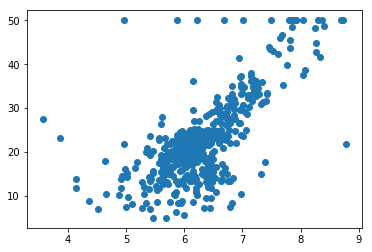

In [10]:
draw_rm_and_price()

# First-Method: Random generation: get best k and best b

In [11]:
import random

In [12]:
def price(rm, k, b):
    return k * rm + b

In [13]:
def price_random(n):#一元一次函数与实际房价
    X_rm = X[:, 5]
    k = random.randint(-n, n)
    b = random.randint(-n, n)
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
    return draw_rm_and_price(), plt.scatter(X_rm, price_by_random_k_and_b)

(None, <matplotlib.collections.PathCollection at 0x1a7600d3278>)

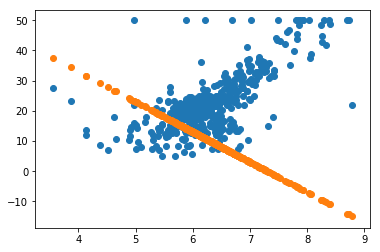

In [14]:
 price_random(100)#k b in random [-100,100]

In [15]:
def loss(y, y_hat): # to evaluate the performance 
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [16]:
def get_the_min_loss(n):  #try different k,b to get the min loss
    min_loss = float('inf')
    best_k, best_b = None, None
    X_rm = X[:, 5]
    for i in range(n):
        k = random.random() * 200 - 100
        b = random.random() * 200 - 100
        price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
        current_loss = loss(y, price_by_random_k_and_b)
        if current_loss < min_loss:
            min_loss = current_loss
            best_k, best_b = k, b
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

In [17]:
get_the_min_loss(10000)

When time is : 0, get best_k: 58.30830451855678 best_b: 17.519090667667882, and the loss is: 131870.10639256568
When time is : 1, get best_k: -7.5967249193843855 best_b: -8.46446873620279, and the loss is: 6380.963144533497
When time is : 14, get best_k: -17.038153637510405 best_b: 65.55349672146744, and the loss is: 4483.67721887284
When time is : 15, get best_k: 10.837726209503671 best_b: -22.32474336050305, and the loss is: 585.8145102547477
When time is : 37, get best_k: -7.755222778299654 best_b: 79.06363460513413, and the loss is: 244.32621464833105
When time is : 67, get best_k: 8.114929829339872 best_b: -28.87013228951261, and the loss is: 44.24356443433222
When time is : 8877, get best_k: 9.41976795006984 best_b: -35.94954241609041, and the loss is: 44.165001113551796


# 2nd-Method: Direction Adjusting

In [55]:
def get_the_min_loss_adjust(n):  #try different k,b to get the min loss/give direction adjusting
    min_loss = float('inf')
    best_k = random.random() * 200 - 100
    best_b = random.random() * 200 - 100
    X_rm = X[:, 5]

    direction = [
    (+1, -1),  # first element: k's change direction, second element: b's change direction
    (+1, +1), 
    (-1, -1), 
    (-1, +1),
    ]

    next_direction = random.choice(direction)

    scalar = 0.1

    for i in range(n):
    
        k_direction, b_direction = next_direction
    
        current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
        price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]

        current_loss = loss(y, price_by_k_and_b)
    
        if current_loss < min_loss: # performance became better
            min_loss = current_loss
            best_k, best_b = current_k, current_b
        
            next_direction = next_direction
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
        else:
            next_direction = random.choice(direction)

In [57]:
get_the_min_loss_adjust(10000)

When time is : 0, get best_k: 21.603258226516125 best_b: -32.50917594181572, and the loss is: 6637.381841341489
When time is : 1, get best_k: 21.503258226516124 best_b: -32.60917594181572, and the loss is: 6519.072826709759
When time is : 2, get best_k: 21.403258226516122 best_b: -32.70917594181572, and the loss is: 6401.8349839455195
When time is : 3, get best_k: 21.30325822651612 best_b: -32.809175941815724, and the loss is: 6285.668313048735
When time is : 4, get best_k: 21.20325822651612 best_b: -32.909175941815725, and the loss is: 6170.572814019426
When time is : 5, get best_k: 21.103258226516118 best_b: -33.00917594181573, and the loss is: 6056.54848685759
When time is : 6, get best_k: 21.003258226516117 best_b: -33.10917594181573, and the loss is: 5943.595331563223
When time is : 7, get best_k: 20.903258226516115 best_b: -33.20917594181573, and the loss is: 5831.713348136334
When time is : 8, get best_k: 20.803258226516114 best_b: -33.30917594181573, and the loss is: 5720.90253

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

###### 7. Using the simple words to describe: What's the machine leanring.

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



In [1]:
import requests

In [3]:
import re

In [4]:
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36'}

In [28]:
url = 'https://baike.baidu.com/item/北京地铁/408485'

In [29]:
page = requests.get(url, headers=headers)

In [30]:
content = page.content.decode('utf-8')
page.status_code

200

In [31]:
line_pattern = re.compile(r'<a target=_blank href="(/item/[\d\w%]+[\w\d%])">(北京[\w\d]+线)</a>')

In [32]:
#line_pattern = re.compile(r'<a target=_blank href="(/item/[\d\w%]+/\d+)" data-lemmaid="\d+">(北京[\w\d]+线)</a>')

In [33]:
all_lines = {}
for link, line in line_pattern.findall(content):
    if line in all_lines: continue
    all_lines[line] = 'https://baike.baidu.com' + link
all_lines

{'北京地铁1号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF',
 '北京地铁13号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF',
 '北京地铁八通线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E5%85%AB%E9%80%9A%E7%BA%BF',
 '北京地铁5号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF',
 '北京地铁8号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF',
 '北京地铁10号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF',
 '北京地铁机场线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%9C%BA%E5%9C%BA%E7%BA%BF',
 '北京地铁4号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF',
 '北京地铁15号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8115%E5%8F%B7%E7%BA%BF',
 '北京地铁昌平线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81

In [35]:
all_lines[line]

'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%9C%BA%E5%9C%BA%E7%BA%BF'

In [62]:
all_stations_Dic = {}
station_patterns = []
for line in all_lines:
    url_line = all_lines[line]
    response_station = requests.get(url_line, headers=headers)
    content = response_station.content.decode('utf-8')
    station_pattern = re.compile(r'<a target=_blank href="(/item/[|%\d\w%]+[\w\d%])">([\w+]+站)</a>')# 错误！！！
    all_stations = {}
    stations = []
    for link_station,station in station_pattern.findall(content):
        if station in stations: continue
        stations.append(station)
        all_stations[line] = stations
    all_stations_Dic.update(all_stations)
all_stations_Dic


{'北京地铁1号线': ['南礼士路站',
  '长椿街站',
  '西单站',
  '黑石头站',
  '高井站',
  '福寿岭站',
  '苹果园站',
  '八角游乐园站',
  '八宝山站',
  '玉泉路站',
  '五棵松站',
  '公主坟站',
  '军事博物馆站',
  '木樨地站',
  '王府井站',
  '东单站',
  '建国门站',
  '永安里站',
  '大望路站',
  '四惠站',
  '四惠东站',
  '天安门西站',
  '天安门东站',
  '安定门站',
  '鼓楼大街站',
  '积水潭站',
  '雍和宫站',
  '东直门站',
  '北京军区站'],
 '北京地铁13号线': ['大钟寺站',
  '知春路站',
  '五道口站',
  '上地站',
  '西二旗站',
  '龙泽站',
  '回龙观站',
  '霍营站',
  '立水桥站',
  '望京西站',
  '芍药居站',
  '光熙门站',
  '柳芳站',
  '东直门站',
  '清华东路西口站',
  '清华东站'],
 '北京地铁八通线': ['四惠站',
  '四惠东站',
  '传媒大学站',
  '管庄站',
  '八里桥站',
  '通州北苑站',
  '果园站',
  '九棵树站',
  '临河里站',
  '环球影城站'],
 '北京地铁5号线': ['刘家窑站',
  '蒲黄榆站',
  '天坛东门站',
  '崇文门站',
  '东单站',
  '灯市口站',
  '东四站',
  '张自忠路站',
  '北新桥站',
  '雍和宫站',
  '和平里北街站',
  '和平西桥站',
  '惠新西街南口站',
  '惠新西街北口站',
  '大屯路东站',
  '北苑路北站',
  '立水桥南站',
  '立水桥站',
  '天通苑南站',
  '天通苑站',
  '天通苑北站'],
 '北京地铁8号线': ['西二旗站',
  '中国美术馆站',
  '朱辛庄站',
  '育知路站',
  '平西府站',
  '回龙观东大街站',
  '霍营站',
  '育新站',
  '西小口站',
  '永泰庄站',
  '林萃桥站',
  '森林公园南门站',
  '北土城站',
  '安华桥站',
  '安德里北街站',
  '鼓

In [63]:
connection_info_src = {}           

for k,v in enumerate(all_stations_Dic):

      for idx, val in enumerate(all_stations_Dic[v]):

         if val not in connection_info_src.keys():

              connection_info_src[val] = []

         if idx >= 1:

              connection_info_src[val].append(all_stations_Dic[v][idx -1])

         if idx + 1 < len(all_stations_Dic[v]):

              connection_info_src[val].append(all_stations_Dic[v][idx+1])

print(connection_info_src)

{'南礼士路站': ['长椿街站'], '长椿街站': ['南礼士路站', '西单站', '高井站', '积水潭站'], '西单站': ['长椿街站', '黑石头站', '宣武门站', '灵境胡同站', '宣武门站', '灵境胡同站'], '黑石头站': ['西单站', '高井站'], '高井站': ['黑石头站', '福寿岭站', '长椿街站'], '福寿岭站': ['高井站', '苹果园站'], '苹果园站': ['福寿岭站', '八角游乐园站', '金安桥站', '海淀五路居站'], '八角游乐园站': ['苹果园站', '八宝山站'], '八宝山站': ['八角游乐园站', '玉泉路站'], '玉泉路站': ['八宝山站', '五棵松站'], '五棵松站': ['玉泉路站', '公主坟站'], '公主坟站': ['五棵松站', '军事博物馆站', '莲花桥站', '西钓鱼台站'], '军事博物馆站': ['公主坟站', '木樨地站', '六里桥东站', '白堆子站'], '木樨地站': ['军事博物馆站', '王府井站', '二里沟站'], '王府井站': ['木樨地站', '东单站', '南锣鼓巷站', '前门站'], '东单站': ['王府井站', '建国门站', '崇文门站', '灯市口站'], '建国门站': ['东单站', '永安里站', '东四十条站', '崇文门站'], '永安里站': ['建国门站', '大望路站'], '大望路站': ['永安里站', '四惠站', '平乐园站', '金台路站'], '四惠站': ['大望路站', '四惠东站', '四惠东站'], '四惠东站': ['四惠站', '天安门西站', '四惠站', '传媒大学站'], '天安门西站': ['四惠东站', '天安门东站'], '天安门东站': ['天安门西站', '安定门站'], '安定门站': ['天安门东站', '鼓楼大街站', '鼓楼大街站', '雍和宫站'], '鼓楼大街站': ['安定门站', '积水潭站', '安德里北街站', '什刹海站', '积水潭站', '安定门站'], '积水潭站': ['鼓楼大街站', '雍和宫站', '长椿街站', '鼓楼大街站'], '雍和宫站': ['积水潭站', '东直门站', '北新桥站', '和平里北街站', '安定

In [67]:
def search(start, destination, connection_grpah):
    pathes = [[start]]
    
    visitied = set()
    
    while pathes: 
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visitied: continue
            
        successors = connection_grpah[froninter]
        
        for city in successors:
            if city in path: continue  
                
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if city == destination: return new_path
        
        visitied.add(froninter)

In [69]:
search("苹果园站","六里桥站",connection_info_src)

['苹果园站', '海淀五路居站', '慈寿寺站', '西钓鱼台站', '公主坟站', '莲花桥站', '六里桥站']

In [73]:
def pretty_print(cities):
    print('🚆->'.join(cities))

In [74]:
pretty_print(search("苹果园站","六里桥站",connection_info_src))

苹果园站🚆->海淀五路居站🚆->慈寿寺站🚆->西钓鱼台站🚆->公主坟站🚆->莲花桥站🚆->六里桥站


下面是同学的使用BeautifulSoup解析包的写法

In [1]:
import requests #爬虫库，解析网页

In [2]:
import re #正则

In [3]:
from bs4 import BeautifulSoup #爬虫库，解析网页

In [4]:
url = 'https://www.bjsubway.com/station/xltcx/' #北京地铁官网

In [5]:
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36'}#给出head

In [7]:
response = requests.get(url, headers = headers, allow_redirects=False,verify=False) #没有证书验证，好像下载certifi和urllib3然后使用PoolManager可以解决，https://urllib3.readthedocs.io/en/latest/user-guide.html#ssl


C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [8]:
response.encoding="gb2312" #说明网页原始code

In [9]:
soup = BeautifulSoup(response.content, 'lxml')

In [10]:
table = soup.findAll('div', attrs={'class':"line_content"}) # line_content属性里的div标签

In [14]:
print(table)

[<div class="line_content">
<div class="line_name">
<div class="subway_num1">1号线</div>
</div>
<div class="station"><a href="/station/xltcx/line1/2013-08-19/3.html">苹果园</a></div>
<div class="station"><a href="/station/xltcx/line1/2013-08-19/4.html">古城</a></div>
<div class="station"><a href="/station/xltcx/line1/2013-08-19/5.html">八角游乐园</a></div>
<div class="station"><a href="/station/xltcx/line1/2013-08-19/6.html">八宝山</a></div>
<div class="station"><a href="/station/xltcx/line1/2013-08-19/7.html">玉泉路</a></div>
<div class="station"><a href="/station/xltcx/line1/2013-08-19/8.html">五棵松</a></div>
<div class="station"><a href="/station/xltcx/line1/2013-08-19/9.html">万寿路</a></div>
<div class="station"><a href="/station/xltcx/line1/2013-08-19/10.html">公主坟</a></div>
<div class="station"><a href="/station/xltcx/line1/2013-08-19/11.html">军事博物馆</a></div>
<div class="station"><a href="/station/xltcx/line1/2013-08-19/12.html">木樨地</a></div>
<div class="station"><a href="/station/xltcx/line1/2013-08-1

In [19]:
nameList = []
for i in table:

    rows = i.findAll('div',attrs={'class':"line_name"}) #根据line name获取line

    for row in rows:

            cols = row.find('div')

            if cols != None:

               name = cols.text.strip()

               nameList.append(name)

In [20]:
print(nameList)

['1号线', '2号线', '4号线', '5号线', '6号线', '7号线', '8号线', '9号线', '10号线', '13号线', '14号线', '15号线', '16号线', '八通线', '昌平线', '亦庄线', '房山线', '机场线', '大兴线', 'S1线']


In [22]:
curName = ''
stationDic= {}

for i in table:

    rows = i.findAll('div')

    for row in rows:

        if row['class']== ['line_name']:

              curName = row.find('div').text.strip()

              stationDic[curName] = []

        else :

            if row['class']== ['station']: #根据“station”获取station，然后将其写入字典中

                 station = row.text.strip()

                 stationDic[curName].append(station)

In [23]:
print(stationDic)

{'1号线': ['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '建国门', '永安里', '国贸', '大望路', '四惠', '四惠东'], '2号线': ['西直门', '积水潭', '鼓楼大街', '安定门', '雍和宫', '东直门', '东四十条', '朝阳门', '建国门', '北京站', '崇文门', '前门', '和平门', '宣武门', '长椿街', '复兴门', '阜成门', '车公庄'], '4号线': ['安河桥北', '北宫门', '西苑', '圆明园', '北京大学东门', '中关村', '海淀黄庄', '人民大学', '魏公村', '国家图书馆', '动物园', '西直门', '新街口', '平安里', '西四', '灵境胡同', '西单', '宣武门', '菜市口', '陶然亭', '北京南站', '马家堡', '角门西', '公益西桥'], '5号线': ['宋家庄', '刘家窑', '蒲黄榆', '天坛东门', '磁器口', '崇文门', '东单', '灯市口', '东四', '张自忠路', '北新桥', '雍和宫', '和平里北街', '和平西桥', '惠新西街南口', '惠新西街北口', '大屯路东', '北苑路北', '立水桥南', '立水桥', '天通苑南', '天通苑', '天通苑北'], '6号线': ['金安桥', '苹果园', '杨庄', '西黄村', '廖公庄', '田村', '海淀五路居', '慈寿寺', '花园桥', '白石桥南', '车公庄西', '车公庄', '平安里', '北海北', '南锣鼓巷', '东四', '朝阳门', '东大桥', '呼家楼', '金台路', '十里堡', '青年路', '褡裢坡', '黄渠', '常营', '草房', '物资学院路', '通州北关', '通运门', '北运河西', '北运河东', '郝家府', '东夏园', '潞城'], '7号线': ['北京西站', '湾子', '达官营', '广安门内', '菜市口', '虎坊桥', '珠市口', '桥湾', '磁器口', '

In [24]:
connection_info_src = {}           

for k,v in enumerate(stationDic):

      for idx, val in enumerate(stationDic[v]):

         if val not in connection_info_src.keys():

              connection_info_src[val] = []

         if idx >= 1:

              connection_info_src[val].append(stationDic[v][idx -1]) #添加stationDic的station左侧元素

         if idx + 1 < len(stationDic[v]):

              connection_info_src[val].append(stationDic[v][idx+1])#添加stationDic的station右侧元素

print(connection_info_src)

{'苹果园': ['古城', '杨庄'], '古城': ['八角游乐园'], '八角游乐园': ['古城', '八宝山'], '八宝山': ['八角游乐园', '玉泉路'], '玉泉路': ['八宝山', '五棵松'], '五棵松': ['玉泉路', '万寿路'], '万寿路': ['五棵松', '公主坟'], '公主坟': ['万寿路', '军事博物馆', '莲花桥', '西钓鱼台'], '军事博物馆': ['公主坟', '木樨地', '北京西站', '白堆子'], '木樨地': ['军事博物馆', '南礼士路'], '南礼士路': ['木樨地', '复兴门'], '复兴门': ['南礼士路', '西单', '长椿街', '阜成门'], '西单': ['复兴门', '天安门西', '灵境胡同', '宣武门'], '天安门西': ['西单', '天安门东'], '天安门东': ['天安门西', '王府井'], '王府井': ['天安门东', '东单'], '东单': ['王府井', '建国门', '崇文门', '灯市口'], '建国门': ['东单', '永安里', '朝阳门', '北京站'], '永安里': ['建国门', '国贸'], '国贸': ['永安里', '大望路', '金台夕照', '双井'], '大望路': ['国贸', '四惠', '九龙山', '朝阳公园'], '四惠': ['大望路', '四惠东', '四惠东'], '四惠东': ['四惠', '高碑店'], '西直门': ['积水潭', '动物园', '新街口', '大钟寺'], '积水潭': ['鼓楼大街'], '鼓楼大街': ['积水潭', '安定门', '安德里北街', '什刹海'], '安定门': ['鼓楼大街', '雍和宫'], '雍和宫': ['安定门', '东直门', '北新桥', '和平里北街'], '东直门': ['雍和宫', '东四十条', '柳芳', '三元桥'], '东四十条': ['东直门', '朝阳门'], '朝阳门': ['东四十条', '建国门', '东四', '东大桥'], '北京站': ['建国门', '崇文门'], '崇文门': ['北京站', '前门', '磁器口', '东单'], '前门': ['崇文门', '和平门'], '和平门': ['前门', 

In [3]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}"""

In [4]:
test_string = "{name:'兰州', geoCoord:[103.73, 36.03]},"

In [31]:
city_location = {
    '香港': (114.17, 22.28)
}

In [33]:
import re        #r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]"

In [34]:
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")

In [51]:
for line in coordination_source.split('\n'):
    city_info = pattern.findall(line)
    if not city_info:continue
    city, long, lat = city_info[0]
    long,lat = float(long),float(lat)
    city_location[city] = long,lat

In [52]:
city_location

{'香港': (114.17, 22.28),
 '兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '海口': (110.35, 20.02),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '台湾': (121.3, 25.03),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '西藏': (91.11, 29.97),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '澳门': (113.54, 22.19)}

In [53]:
import math

In [54]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [55]:
def get_geo_distance(city1,city2):
    return geo_distance(city_location[city1],city_location[city2])

In [57]:
get_geo_distance("上海","北京")

727.52769688981

In [58]:
import networkx as nx

以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

## （Optional）Create different policies for transfer system.


As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)